In [59]:
import matplotlib.pyplot as plt

# Initialize the dictionary to store the data
data = {}
time_data = {}
currentFarmer = ""

# Open the text file and loop through each line
time_step = 0
with open('output.txt', 'r') as f:
    for line in f:
        #we're starting a new time step
        if 'Pasture' in line:
            pasture_health = line.split(" ")[-1]
            time_data[time_step] = {'pasture_health': float(pasture_health)}
            time_step += 2 #seconds
        elif 'Cows for' in line:
            #find FarmerAgentX in the string and get the X value
            farmer = line.split(" ")[3].split("@")[0]
            currentFarmer = farmer
            data[time_step] = {currentFarmer : 0}
        elif 'Cow with' in line:
            data[time_step][currentFarmer] += 1


KeyError: 2

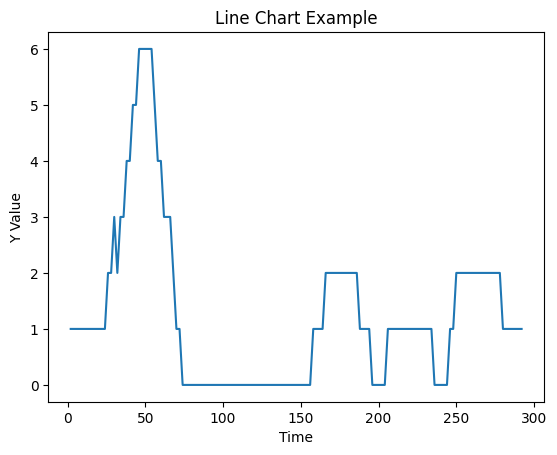

In [55]:
import matplotlib.pyplot as plt

# Define the x and y values
x = list(data.keys())
y = [list(data[k].values())[0] for k in x]

# Create the line chart
plt.plot(x, y)

# Add axis labels and a title
plt.xlabel('Time')
plt.ylabel('Y Value')
plt.title('Line Chart Example')

# Display the chart
plt.show()

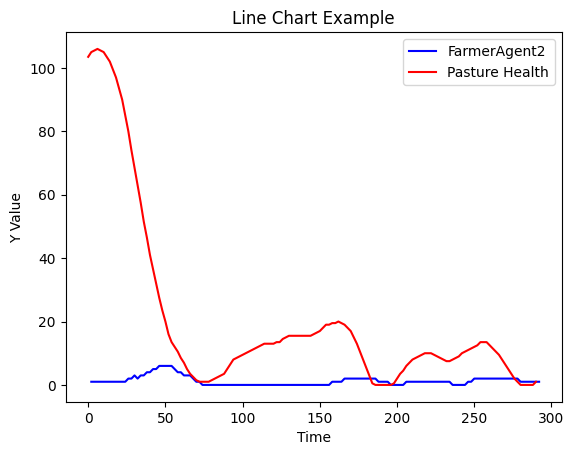

In [58]:
x1 = list(data.keys())
y1 = [list(data[k].values())[0] for k in x1]

x2 = list(time_data.keys())
y2 = [list(time_data[k].values())[0] for k in x2]

plt.plot(x1, y1, color='blue', label='FarmerAgent2')
plt.plot(x2, y2, color='red', label='Pasture Health')

# Add axis labels and a title
plt.xlabel('Time')
plt.ylabel('Y Value')
plt.title('Line Chart Example')

# Add a legend
plt.legend()

# Display the chart
plt.show()

In [60]:
test = {"2" : [('FarmerAgent1',0,0), ('FarmerAgent2',0,0)], "4" : [('FarmerAgent1',0,0), ('FarmerAgent2',0,0)]}

TypeError: unhashable type: 'dict'